In [23]:
import glob
import pandas as pd
import geopandas as gpd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import folium
import pyproj
import sqlalchemy
from sqlalchemy import create_engine

# Getting the data

## Sumo wrestlers shusshin (birth place)

In [2]:
# get data file names
path =r'C:\Users\Maria\Documents\ETLnerds_backup\sumo_demographics\cervus-sumo-banzuke\data'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
sumo_data = pd.concat(dfs, ignore_index=True)

In [3]:
sumoData_df = sumo_data[["shusshin"]].copy()  #pd.DataFrame({"Total Players": [Num_Players]})

In [4]:
sumoData_df.head()

,shusshin
0,Hokkaido
1,Hokkaido
2,Aomori
3,Aomori
4,Mie


In [5]:
shusshin_df = (sumoData_df.shusshin.value_counts()
                                   .reset_index()
                                   .rename({'index':'shusshin', 
                                            'shusshin':'total_members'},
                                           axis=1)
              )
shusshin_df.head(5)

,shusshin,total_members
0,Tokyo,12023
1,Osaka,10594
2,Aichi,10345
3,Fukuoka,10013
4,Kagoshima,8146


In [6]:
type(shusshin_df)

pandas.core.frame.DataFrame

In [7]:
#sumoData_df.to_csv('SumoData', header=True) 

In [8]:
#set the filepath and load in a shapefile
fp = r"C:\Users\Maria\Downloads\gm-jpn-all_u_2\gm-jpn-all_u_2\polbnda_jpn.shp"
map_df = gpd.read_file(r"C:/Users/Maria/Downloads/gm-jpn-all_u_2/gm-jpn-all_u_2/polbnda_jpn.shp")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [9]:
#create clean shusshin column
map_df['shusshin'] = map_df['laa'].apply(lambda s:s.split(' ')[0])


In [10]:
#view new column
map_df.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,shusshin
0,FA001,JPN,Hokkai Do,Shibetoro Mura,-99999999,0,01700,UNK,JPN,"POLYGON ((148.367599487305 45.22566604614263, ...",Shibetoro
1,FA001,JPN,Hokkai Do,Wakkanai Shi,41592,2005,01214,UNK,JPN,"POLYGON ((141.997406005859 45.23680114746089, ...",Wakkanai
2,FA001,JPN,Hokkai Do,Rebun Cho,3410,2005,01517,UNK,JPN,"POLYGON ((141.031692504883 45.27460098266599, ...",Rebun
3,FA001,JPN,Hokkai Do,Shana Mura,-99999999,0,01699,UNK,JPN,"POLYGON ((148.342697143555 45.29119873046882, ...",Shana
4,FA001,JPN,Hokkai Do,Sarufutsu Mura,2940,2005,01511,UNK,JPN,"POLYGON ((141.997406005859 45.23680114746089, ...",Sarufutsu


#### So now we have two dataframes ready to go.

### First let’s preview what our map looks like with no data in it. 

### Cool, it’s Japan!

#### Much better. Now we need to merge our geodata with our cleaned Shusshin dataset. We’ll do that using pd.merge(). 

In [26]:
shusshin_map_data_df = pd.merge(shusshin_df, map_df, 
                            left_on='shusshin', right_on='shusshin', 
                            how='left'
                            )

In [28]:
shusshin_map_data_df.head()

,shusshin,total_members,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry
0,Tokyo,12023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Osaka,10594,FA001,JPN,Osaka Fu,Osaka Shi,2628811.0,2005.0,27100,UNK,JPN,"POLYGON ((135.560104370117 34.75386810302734, ..."
2,Osaka,10594,FA001,JPN,Osaka Fu,Osaka Shi,-89999999.0,2005.0,27100,UNK,JPN,"POLYGON ((135.409713745117 34.65902709960941, ..."
3,Osaka,10594,FA001,JPN,Osaka Fu,Osaka Shi,-89999999.0,2005.0,27100,UNK,JPN,"POLYGON ((135.39208984375 34.6422500610352, 13..."
4,Osaka,10594,FA001,JPN,Osaka Fu,Osaka Shi,-89999999.0,2005.0,27100,UNK,JPN,"POLYGON ((135.422164916992 34.6219177246094, 1..."


# Map time!

#### Let’s start mapping. First we need to do some prep work for Matplotlib. We’ll start by setting a variable to map, setting the range and creating the figure for the map to be drawn in.

<IPython.core.display.Javascript object>


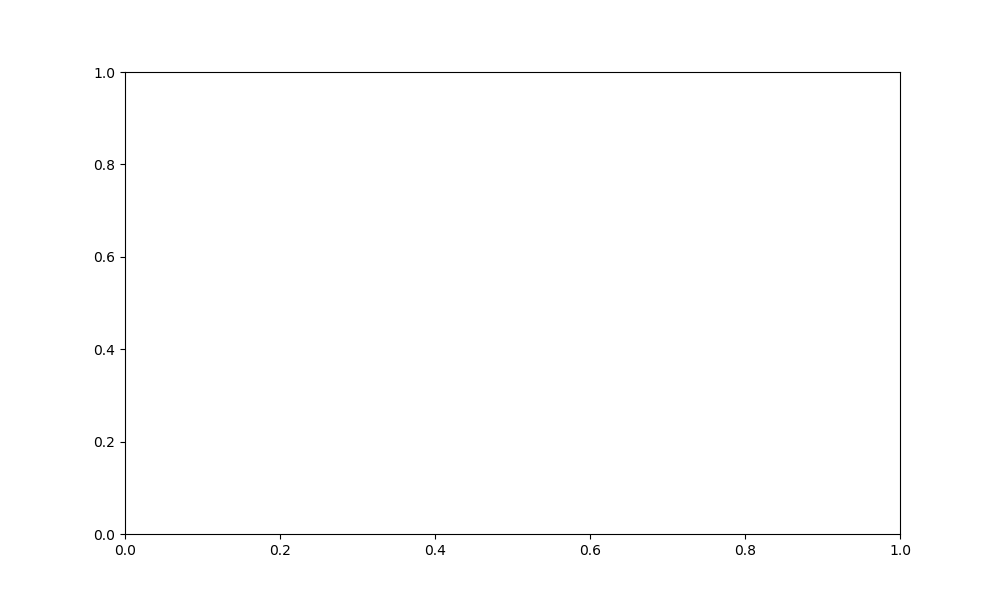

In [29]:
# set a variable that will call whatever column we want to visualize on the map
variable = 'shusshin'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

### The stage has been set. Map time. 

In [30]:
map_df['shusshin'] = map_df['laa'].apply(lambda s:s.split(' ')[0])

In [31]:
shusshin_df.head(5)

,shusshin,total_members
0,Tokyo,12023
1,Osaka,10594
2,Aichi,10345
3,Fukuoka,10013
4,Kagoshima,8146


In [32]:
map_df.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry,shusshin
0,FA001,JPN,Hokkai Do,Shibetoro Mura,-99999999,0,01700,UNK,JPN,"POLYGON ((148.367599487305 45.22566604614263, ...",Shibetoro
1,FA001,JPN,Hokkai Do,Wakkanai Shi,41592,2005,01214,UNK,JPN,"POLYGON ((141.997406005859 45.23680114746089, ...",Wakkanai
2,FA001,JPN,Hokkai Do,Rebun Cho,3410,2005,01517,UNK,JPN,"POLYGON ((141.031692504883 45.27460098266599, ...",Rebun
3,FA001,JPN,Hokkai Do,Shana Mura,-99999999,0,01699,UNK,JPN,"POLYGON ((148.342697143555 45.29119873046882, ...",Shana
4,FA001,JPN,Hokkai Do,Sarufutsu Mura,2940,2005,01511,UNK,JPN,"POLYGON ((141.997406005859 45.23680114746089, ...",Sarufutsu


In [33]:
test_df = pd.merge(map_df, shusshin_df, 
                            on='shusshin', 
                            how='inner'
                            )

In [34]:
test_df.total_members[0]

2524

map_df = map_df.to_crs({'init' : 'epsg:4326'})

In [35]:
japan_map = folium.Map(location = [36.2, 138.2], zoom_start = 5)

In [36]:
japan_map

<IPython.core.display.Javascript object>


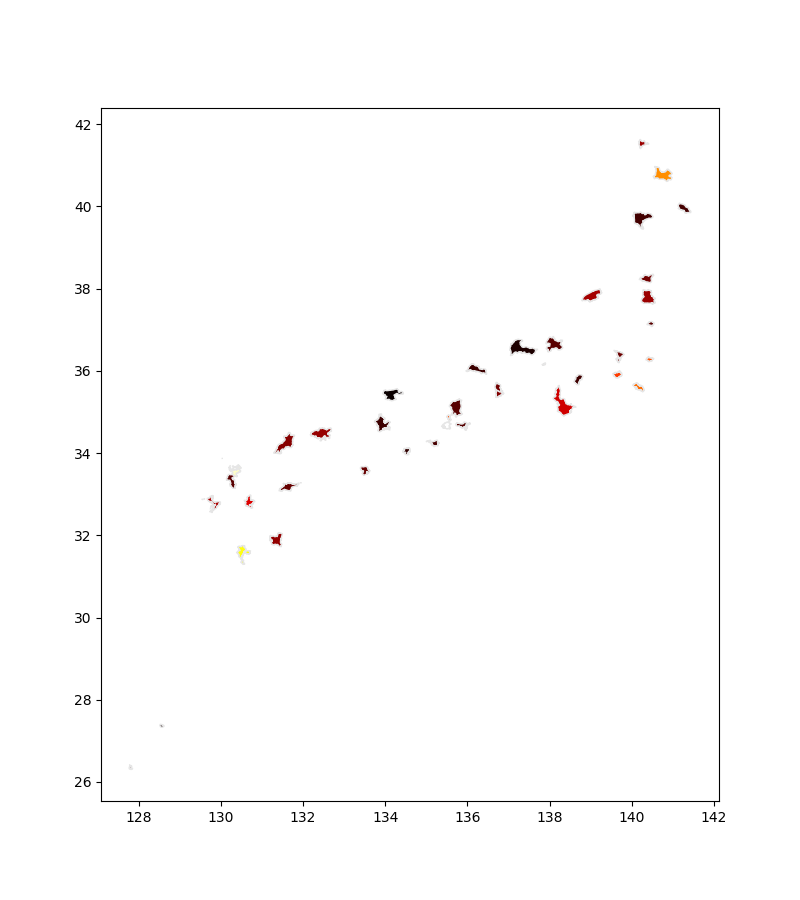

In [37]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'total_members'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(8, 9))

test_df.plot(column=variable, cmap='hot', linewidth=1, ax=ax, edgecolor='0.9')

## Customizing the map
#### First off, that axis needs to go. 

In [20]:
# remove the axis
ax.axis('off')

(127.08760757446274, 142.1177909851073, 25.537066555023227, 42.3934659004212)

#### Then let’s add a title to our map, and some text noting the source. Maps are usually nice to look at, but if you don’t provide context then it doesn’t mean much. 

In [21]:
# add a title
ax.set_title('Shusshiin Locations', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: Global Map Japan, (Released in 2016)', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

Text(0.1, 0.08, 'Source: Global Map Japan, (Released in 2016)')

### Beautiful! Still one thing missing though. We should probably add a legend that shows the range of value for the user. This will help it to not look so squished as well. 

#### Pushing files to the SQL database server 

In [24]:
engine = create_engine("sqlite:///sumo.sqlite")

In [38]:
shusshin_df.to_sql('sumo', con=engine)

In [39]:
#Show SQLite file has loaded successfully
engine.execute('SELECT * FROM sumo LIMIT 5').fetchall()

[(0, 'Tokyo', 12023),
 (1, 'Osaka', 10594),
 (2, 'Aichi', 10345),
 (3, 'Fukuoka', 10013),
 (4, 'Kagoshima', 8146)]